#   <center> K-Nearest Neighbors</center>

In this notebook you will load the customer dataset and use k-nearest neighbors algorithm to predict a data point.

let's see what is <i><b>K-nearest neighbors</b></i>
<p>
    <b>K-nearest neighbors</b> is supervised learning algorithm where data is trained with data points according to their classification.
</p>   
<p>
    once a point is to be predicted, it takes k-nearest neighbors into account to predict the actual and correct class </p> 

<img src="https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg">

<b>Let's load required libraries </b> 

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

<p>
    Lets visualize the dataset this way, assume that a telecommunication provider has divide its customers baseby service usage patterns, categorizing the customers into four groups.<br><br>
    <b>1.Basic Service</b> <br>
    <b>2.E-Service</b> <br>
    <b>3.Plus Service</b><br>
    <b>4.Total service</b><br>
  </p>
   
<p>
    If the demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It's a classification problem.
</p>
<p> 
    we need to build a model which can be used to predict class of a new or unknown case.
    The example focuses on using demographic data, such as region, age, and marital, to predict patterns.
    The target field is <b>Custcat</b>
</p>
<p>
    <b> Objective:</b> To build a classifier which can predict class of unknown cases.
      We will be using specific type of classification called as K-nearest neighbors. 
</p>
    



In [5]:
#Loading the dataset
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis


#### Lets see how many rows and colums our dataset have...!

In [6]:
df.shape

(1000, 12)

#### To see how many cases of each class is there in dataset 

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### It means 
###### <br>281 Plus Service,<br> 266 Basic-service,<br> 236 Total Service,<br> 217 E-Service customers


#### lets plot histogram  of income

(array([445., 267., 115.,  52.,  39.,  22.,  12.,  15.,   5.,   5.,   6.,
          2.,   3.,   2.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   9.  ,   42.18,   75.36,  108.54,  141.72,  174.9 ,  208.08,
         241.26,  274.44,  307.62,  340.8 ,  373.98,  407.16,  440.34,
         473.52,  506.7 ,  539.88,  573.06,  606.24,  639.42,  672.6 ,
         705.78,  738.96,  772.14,  805.32,  838.5 ,  871.68,  904.86,
         938.04,  971.22, 1004.4 , 1037.58, 1070.76, 1103.94, 1137.12,
        1170.3 , 1203.48, 1236.66, 1269.84, 1303.02, 1336.2 , 1369.38,
        1402.56, 1435.74, 1468.92, 1502.1 , 1535.28, 1568.46, 1601.64,
        1634.82, 1668.  ]),
 <a list of 50 Patch objects>)

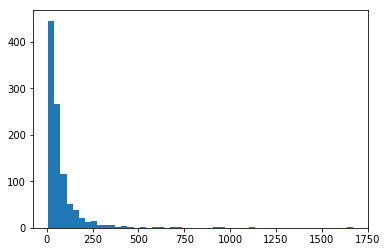

In [9]:
plt.hist(df['income'],bins=50)
# it shows at point 9 on x-axis we have value of 445 on y-axis

If you dont want those details then we can do it in follwing way

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9604af4e80>]],
      dtype=object)

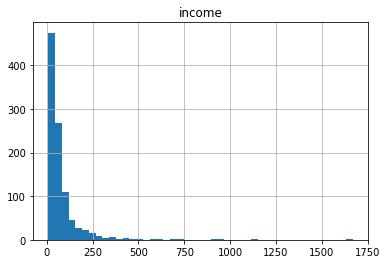

In [15]:
df.hist(column='income',bins=45)

#### Feature set

lets define feature set

In [16]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
X=df[['region', 'tenure', 'age','marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside',]]

#to see first five rows
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


But above is pandas dataframe. To use scikit-learn library we have to convert it to  numpy array

In [20]:
X=df[['region', 'tenure', 'age','marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside',]].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

same step for our labels

In [21]:
y=df['custcat'].values
y[0:5]


array([1, 4, 3, 1, 3])

## Normalizing the data

Data Standardization give data zero mean and unit variance,

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [23]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

###  <font color='blue'> Train Test Split</font>

Out of Sample Accuracy is the percentage of correct predictions that model makes on data that the model has NOT been trained on.
Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.
<p>
    <b>Our model should have high out of sample accuarcy, because the purpose of any model is obviously to make correct predictions on unknown data</b>
    
  <b> we can improvet the accuracy of model by using a method called Train/Test Split</b>
  
  <b>Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.  </b>
 
 </p>

<p> <b><font color='red'> This will provide a more accurate evaluation on out-of-sample accuracy because testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problem </font> </b> 
</p>

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)
print('train set',X_train.shape,y_train.shape)
print('==========================================================================')

print('test set', X_test.shape,y_test.shape)

train set (800, 11) (800,)
test set (200, 11) (200,)


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Classification 

### K nearest neighbor (K-NN)

<b> Import the library</b>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [26]:
k=4
nei=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(nei)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


## Predicting

<b>We can use the model to predict the test data set</b>

In [27]:
y_hat=nei.predict(X_test)

In [29]:
print("y_hat values==>",y_hat[0:5])

y_hat values==> [1 1 3 2 4]


## Accuracy evaluation

In multilabel classification, __accuracy classification score__ function computes subset accuracy.<br> 
This function is equal to the jaccard_similarity_score function. Essentially, it calculates how match the actual labels and predicted labels are in the test set.

__what is jaccard similarity coefficient score?__ <br>It is defined as the __size of the intersection__ divided by the __size of the union of two label sets__, is __used to compare set of predicted labels__ for a sample to the corresponding set of labels in y_true.

In [31]:
from sklearn import metrics

# metrics.accuracy_score(ground_truth_values, predicted_values )

print("Train set accuracy",metrics.accuracy_score(y_train,nei.predict(X_train) ) )
print("Test set Accurcay",metrics.accuracy_score(y_test,y_hat ) )

Train set accuracy 0.5475
Test set Accurcay 0.32


## Can you build the same model again,but with k=6? Give it a try

__Think about other K?__

K in KNN, is the number of nearest neighbors to examine <br>
It is supposed to be specified by User. So, how we choose right K?<br>
The general solution is to reserve a part of your data for testing the accuracy of the model.<br>
Then chose k =1, __use the training part for modeling,__ and __calculate the accuracy of prediction using all samples in your test set.__ <br> Repeat this process, increasing the k, and see which k is the best for your model.

#### We can calculate the accuracy of KNN for different Ks.

In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfusionMaxt =[]

for n in range(1,Ks):
    tmp=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    #training using train data and predicting below by using test set only
    
    y_hats=tmp.predict(X_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test,y_hats)
    
    std_acc[n-1]=np.std(y_hats==y_test)/np.sqrt(y_hats.shape[0])
print(mean_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]


#### You can plot model accuracy for different number of Neighbors 

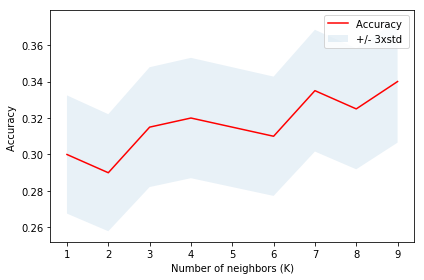

In [33]:
plt.plot(range(1,Ks),mean_acc,'r')

plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)

plt.legend(('Accuracy ', '+/- 3xstd'))

plt.ylabel('Accuracy ')

plt.xlabel('Number of neighbors (K)')

plt.tight_layout()

plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


## Thank you for giving it a try &#128519;

The above notebook is creted by <a href="https://github.com/tejas-2232"> Tejas Bachhav</a> <br>

You can Visit My LinkedIn profile:<a href="https://in.linkedin.com/in/tejas-bachhav-576798168">Tejas Bachhav</a>


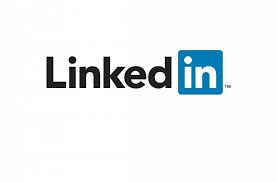